## Math Skills, Confindence & Anxiety


In [11]:
import pandas as pd
import numpy as np
import os.path as op

pati = '/Users/mrenke/data/ds-dnumrisk/add_tables'
target_folder = '/Users/mrenke/data/ds-dnumrisk/derivatives/phenotype'

# Data from participants (ag & gender & group assignments)
df_participants = pd.read_csv(op.join(pati,'subjects_recruit&scan_scanned_12April.csv'), header=0) #, index_col=0
df_participants = df_participants.loc[:,['subject ID', 'age','group','gender']].rename(mapper={'subject ID': 'subject'},axis=1).dropna().astype({'subject': int, 'group': int}).set_index('subject')
df_participants.head()

,age,group,gender
subject,,,
1,19.0,0,w
2,17.0,1,w
3,15.0,0,w
4,17.0,1,w
5,20.0,0,w


In [2]:
fn = op.join(pati, 'Fragebogen_Antworten-digitalisiert.xlsx')
table_raw = pd.read_excel(fn, 'MatheSelbstkonzept,Mathematikan')
table = table_raw.loc[2:62,:].rename(mapper={'Unnamed: 0':'subject'},axis=1).astype({'subject': int}).set_index('subject')
table.head()

,1,2,3,4a,4b,4c,Unnamed: 7,Konventions&Regelwissen,Unnamed: 9,Unnamed: 10
subject,,,,,,,,,,
1,3,3,3,1,1,2,NaN,36,1,NaN
2,1,1,5,3,2,3,Wut&Frust,6,6,jumping
3,3,4,2,2,1,2,NaN,29,1,jumping&
4,2,2,4,3,5,4,NaN,34,1,jumping
5,3,2,3,1,2,3,NaN,30,0,NaN


In [3]:
# Maths self concept/ confidence
df_self_concept = table.loc[:,[1,2,3]]
self_concept_questions = table_raw.loc[0,[1,2,3]]
self_concept_questions # 1 & 2 wie gut, 3 wie schwer --> inverse
df_self_concept[3] = 5 - df_self_concept[3] # make the inverse
df_self_concept['conf_mean'] = df_self_concept.mean(axis=1)
df_self_concept.head()


,1,2,3,conf_mean
subject,,,,
1,3,3,2,2.666667
2,1,1,0,0.666667
3,3,4,3,3.333333
4,2,2,1,1.666667
5,3,2,2,2.333333


In [4]:

df_anxiety =  table.loc[:,['4a','4b','4c']]
df_skill=table.loc[:,['Konventions&Regelwissen','Unnamed: 9' ]].rename(mapper={'Konventions&Regelwissen':'skill_score','Unnamed: 9':'mistakes'},axis=1) # score & mistakes

In [5]:
df_anxiety['anx_mean'] = df_anxiety.mean(axis=1) 
df_anxiety = df_anxiety.astype('float64')
df_anxiety.head()

,4a,4b,4c,anx_mean
subject,,,,
1,1.0,1.0,2.0,1.333333
2,3.0,2.0,3.0,2.666667
3,2.0,1.0,2.0,1.666667
4,3.0,5.0,4.0,4.000000
5,1.0,2.0,3.0,2.000000


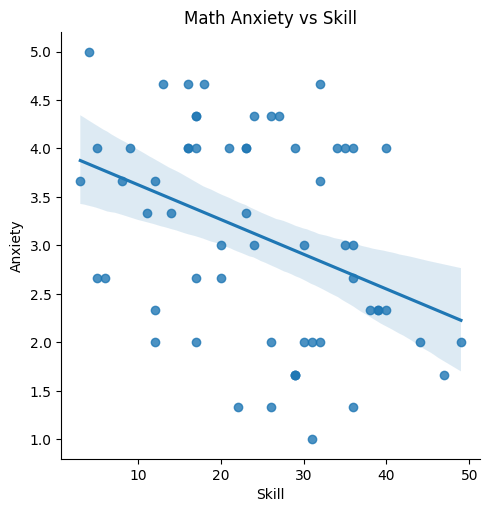

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns   

df_combined = pd.concat([df_skill['skill_score'].astype('float64'), df_anxiety, df_participants], axis=1)

y_var = 'anx_mean' # '4c' # 4b' #
x_var = 'skill_score' # 'conf_mean'
fig = sns.lmplot(x=x_var, y=y_var, data=df_combined) #, hue='group'
fig.set(ylabel='Anxiety', xlabel='Skill', title='Math Anxiety vs Skill')   

In [15]:
df_combined = pd.concat([df_skill['skill_score'].astype('float64'), df_anxiety['anx_mean'], df_self_concept['conf_mean']], axis=1)
df_combined.to_csv(op.join(target_folder, 'math_skill&confidence&anxiety-means.csv'))
df_combined.head()


,skill_score,anx_mean,conf_mean
subject,,,
1,36.0,1.333333,2.666667
2,6.0,2.666667,0.666667
3,29.0,1.666667,3.333333
4,34.0,4.000000,1.666667
5,30.0,2.000000,2.333333
